In [29]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
! curl https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv --output AB_NYC_2019.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 6912k  100 6912k    0     0  3657k      0  0:00:01  0:00:01 --:--:-- 3655k


In [69]:
df_raw = pd.read_csv("AB_NYC_2019.csv", header=0) 

In [163]:
num_features = ["longitude", "latitude", 
             "minimum_nights", "number_of_reviews", "reviews_per_month",
          "calculated_host_listings_count", "availability_365"]
cat_features = ["neighbourhood_group","room_type", ]
features = cat_features+num_features
all_cols = features+["price"]

In [164]:
df_base = df_raw[all_cols].fillna(0)

### Q1 What is the most frequent observation (mode) for the column 'neighbourhood_group'?

In [72]:
df_base.neighbourhood_group.value_counts(normalize=True)

Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: neighbourhood_group, dtype: float64

#### building the validation framework

In [78]:
RANDOM_SEED=42

In [147]:
train_validation_df, test_df  = train_test_split(df_base, test_size=0.2, train_size=0.8, random_state=RANDOM_SEED)

In [74]:
len(train_validation_df), len(test_df)

(39116, 9779)

In [148]:
test_df.reset_index(drop=True) 
y_test = test_df["price"]
del test_df["price"]
X_test = test_df

In [149]:
train_df, validation_df = train_test_split(train_validation_df, 
                                           test_size=0.25, 
                                           train_size=0.75, 
                                           random_state=RANDOM_SEED)

In [150]:
train_df.reset_index(drop=True)
y_train = train_df["price"]
del train_df["price"]
X_train = train_df

validation_df.reset_index(drop=True)
y_val = validation_df["price"]
del validation_df["price"]
X_val = validation_df

In [83]:
len(df_base) , len(X_test)+ len(X_train)+ len(X_val)

(48895, 48895)

### Q2 correlation matrix of numerical variables

In [100]:
# using absolute value of the correlation
corrM = pd.concat([X_train, y_train] ,axis=1)[num_features].corr(method="pearson").abs()
corrM

,longitude,latitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
longitude,1.000000,0.080301,0.146318,0.060660,0.055084,0.134642,0.117041,0.083666
latitude,0.080301,1.000000,0.035428,0.027441,0.006246,0.007159,0.019375,0.005891
price,0.146318,0.035428,1.000000,0.046668,0.048225,0.052908,0.053746,0.080121
minimum_nights,0.060660,0.027441,0.046668,1.000000,0.076020,0.120703,0.118647,0.138901
number_of_reviews,0.055084,0.006246,0.048225,0.076020,1.000000,0.590374,0.073167,0.174477
reviews_per_month,0.134642,0.007159,0.052908,0.120703,0.590374,1.000000,0.048767,0.165376
calculated_host_listings_count,0.117041,0.019375,0.053746,0.118647,0.073167,0.048767,1.000000,0.225913
availability_365,0.083666,0.005891,0.080121,0.138901,0.174477,0.165376,0.225913,1.000000


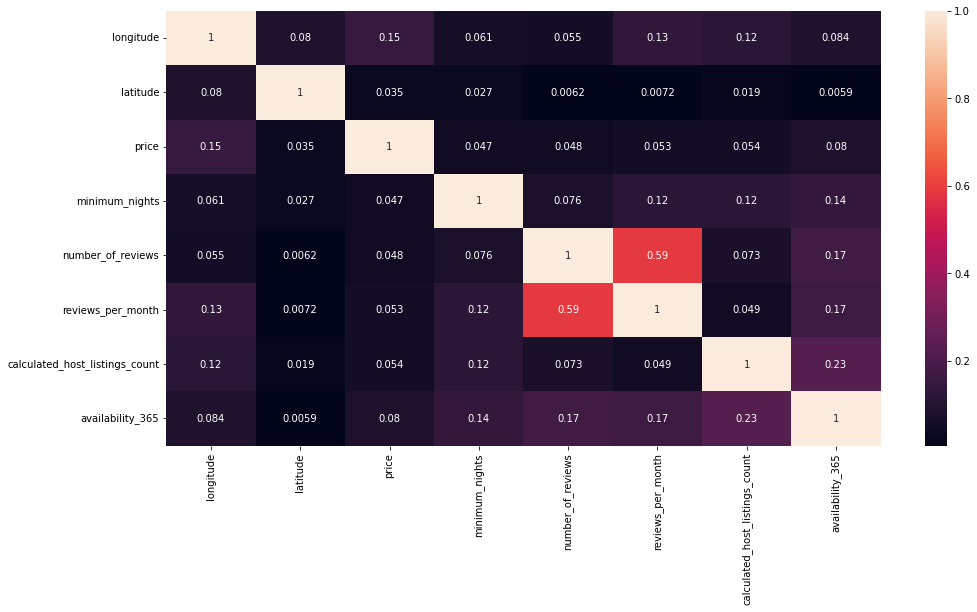

In [101]:
import seaborn as sn
import matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
sn.heatmap(corrM, annot=True)
plt.show()

In [115]:
df_corrm = corrM.unstack().drop_duplicates().sort_values(ascending=False).to_frame(name="corr")

In [118]:
df_corrm[df_corrm["corr"] <1].max()

corr    0.590374
dtype: float64

### Q3 mutual information

In [121]:
import numpy as np
from sklearn.metrics import mutual_info_score

In [127]:
df_mi = pd.concat([X_train, y_train], axis=1)
df_mi["above_average"] = np.where(df_mi["price"] >= 154, 1,0)
df_mi.head(10)

,neighbourhood_group,room_type,longitude,latitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price,above_average
13575,Brooklyn,Entire home/apt,-73.94495,40.72760,3,29,0.70,13,50,99,0
48476,Manhattan,Private room,-74.00498,40.70847,1,0,0.00,1,7,57,0
44499,Bronx,Entire home/apt,-73.92766,40.83149,40,0,0.00,1,0,70,0
17382,Brooklyn,Entire home/apt,-73.99407,40.66448,2,3,0.08,1,0,130,0
14638,Manhattan,Private room,-74.00012,40.74118,1,48,1.80,2,67,110,0
42752,Manhattan,Entire home/apt,-73.99633,40.75183,30,0,0.00,1,167,140,0
35909,Brooklyn,Private room,-73.91394,40.69855,3,2,0.31,1,365,63,0
42678,Manhattan,Entire home/apt,-73.94718,40.82734,4,3,1.13,1,6,85,0
31337,Brooklyn,Private room,-73.92069,40.70473,3,33,2.47,1,7,85,0
44629,Queens,Private room,-73.76511,40.76176,31,0,0.00,1,69,40,0


In [129]:
max_mi = [None,0]

for feat in cat_features:
    _mi = round(mutual_info_score(df_mi[feat], df_mi["above_average"]),2)
    print(f"rounded mutual information score {feat} vs above avg price: {_mi}")
    if _mi > max_mi[1]:
        max_mi[0] = feat
        max_mi[1] = _mi

print(f"maximal mutual info score goes to: {max_mi[0]}")


rounded mutual information score neighbourhood_group vs above avg price: 0.05
rounded mutual information score room_type vs above avg price: 0.14
maximal mutual info score goes to: room_type


## Q4

In [130]:
from sklearn.feature_extraction import DictVectorizer

In [183]:
y_train = np.where(y_train >= 154, 1,0)
y_val = np.where(y_val >= 154, 1,0)

In [184]:
dicts = train_df[features].to_dict(orient="records")
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts)

In [185]:
val_dicts = validation_df[features].to_dict(orient="records")
X_val = dv.transform(val_dicts)

In [199]:
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=RANDOM_SEED)

In [187]:
model.fit(X_train, y_train)

/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [190]:
y_pred = model.predict_proba(X_val)[:, 1]

In [202]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_val, y_pred >= 0.5)
accuracy

0.7854586358523367

### Q5 feature elimination

In [220]:
q5_features = {"neighbourhood_group", "room_type", "number_of_reviews", "reviews_per_month"}

dv = DictVectorizer(sparse=False)
model = LogisticRegression(solver='lbfgs', C=1.0, random_state=RANDOM_SEED)
model_versions=dict()
feature_with_lowest_diff = None
lowest_diff = 10000

In [221]:
for removed_feature in features:
    
    _df_train = train_df.copy()
    del _df_train[removed_feature]
    tr_dict = _df_train.to_dict(orient="records")
    _X_train = dv.fit_transform(tr_dict)
    
    _df_val = validation_df.copy()
    del _df_val[removed_feature]
    val_dict = _df_val.to_dict(orient="records")
    _X_val = dv.fit_transform(val_dict)
    
    model.fit(_X_train, y_train)
    
    _y_pred = model.predict_proba(_X_val)[:,1]
    
    _acc = accuracy_score(y_val, _y_pred>=0.5)
    _diff = abs(accuracy - _acc)
    
    print(f"removed feature: {removed_feature} : accuracy: {round(_acc,2)} difference {round(_diff,2)}")
    
    if _diff < lowest_diff and removed_feature in q5_features:
        lowest_diff = _diff
        feature_with_lowest_diff = removed_feature
    
    model_versions[removed_feature]=_diff
    

/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


removed feature: neighbourhood_group : accuracy: 0.75 difference 0.03


/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


removed feature: room_type : accuracy: 0.72 difference 0.06


/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


removed feature: longitude : accuracy: 0.79 difference 0.0


/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


removed feature: latitude : accuracy: 0.79 difference 0.0


/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


removed feature: minimum_nights : accuracy: 0.78 difference 0.0


/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


removed feature: number_of_reviews : accuracy: 0.79 difference 0.0


/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


removed feature: reviews_per_month : accuracy: 0.79 difference 0.0


/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


removed feature: calculated_host_listings_count : accuracy: 0.79 difference 0.0
removed feature: availability_365 : accuracy: 0.78 difference 0.0


/Users/abarabas/devel/jupyter/venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [222]:
feature_with_lowest_diff , lowest_diff

('reviews_per_month', 0.0004090397791185474)

## Q6 seeking alpha

In [234]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from math import sqrt

In [275]:
train_df_rl, validation_df_rl = train_test_split(train_validation_df, 
                                           test_size=0.25, 
                                           train_size=0.75, 
                                           random_state=RANDOM_SEED)


In [276]:
y_train_rl = np.log1p(train_df_rl["price"])
X_train_rl = train_df_rl[features]
y_val_rl = np.log1p(validation_df_rl["price"])
X_val_rl = validation_df_rl[features]
alphas = [0, 0.01, 0.1, 1, 10]
q6_results=dict()
best_alpha, best_rmse = None, 1

In [277]:
dv = DictVectorizer(sparse=False)
train_dicts = X_train_rl.to_dict(orient="records")
X_train_rl = dv.fit_transform(train_dicts)

In [278]:
val_dicts = X_val_rl.to_dict(orient="records")
X_val_rl = dv.transform(val_dicts)

In [279]:
for alph in alphas:
    lrmodel = Ridge(alpha=alph)
    lrmodel.fit(X_train_rl, y_train_rl)
    _y_pred = lrmodel.predict(X_val_rl)
    _rmse = round(sqrt(mean_squared_error(y_val_rl, _y_pred)),3)
    print(f"alpha : {alph} , RMSE: {_rmse}")
    if _rmse < best_rmse or (_rmse == best_rmse and alph < best_alpha):
        best_alpha, best_rmse = alph, _rmse

alpha : 0 , RMSE: 0.497
alpha : 0.01 , RMSE: 0.497
alpha : 0.1 , RMSE: 0.497
alpha : 1 , RMSE: 0.497
alpha : 10 , RMSE: 0.498


In [280]:
best_alpha, round(best_rmse,3)

(0, 0.497)